In [1]:
# notebook last tested with abtem version 1.0.0beta6

from abtem import __version__
print('current version:', __version__)

from abtem.waves import PlaneWave
from abtem.potentials import Potential
from abtem.plot import show_atoms
from abtem.temperature import FrozenPhonons

from ase.io import read
import matplotlib.pyplot as plt
import numpy as np

def block_zeroth_order(diffraction_pattern):
    shape = diffraction_pattern.shape
    diffraction_pattern._array[shape[0] // 2, shape[1] // 2] = 0.
    return diffraction_pattern

current version: 1.0.0beta6


# SAED pattern with TDS

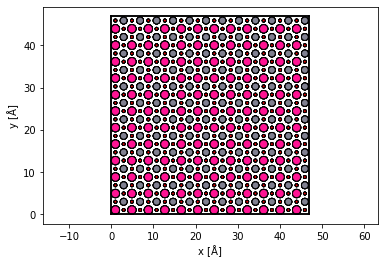

In [2]:
atoms = read('data/srtio3_100.cif') # import strontium titanate

atoms *= (12, 12, 8) # repeat atomic structure

atoms.center()

show_atoms(atoms)

In [3]:
sigmas = {'Sr':.1, 'Ti':.1, 'O':.1} # standard deviations of thermal vibrations

frozen_phonons = FrozenPhonons(atoms, num_configs=30, sigmas=sigmas)

potential = Potential(frozen_phonons, sampling=.04, slice_thickness=2, parametrization='kirkland', device='cpu')

In [4]:
# for no TDS; provide the atoms directly
# potential = Potential(atoms, sampling=.04, slice_thickness=2, parametrization='kirkland', device='cpu')

In [5]:
wave = PlaneWave(energy=300e3, device='cpu')

exit_waves = wave.multislice(potential)

In [6]:
exit_waves.array.shape # shape of the exit waves, one for each frozen phonon configuration

(30, 1172, 1172)

Text(0, 0.5, 'scattering angle y [mrad]')

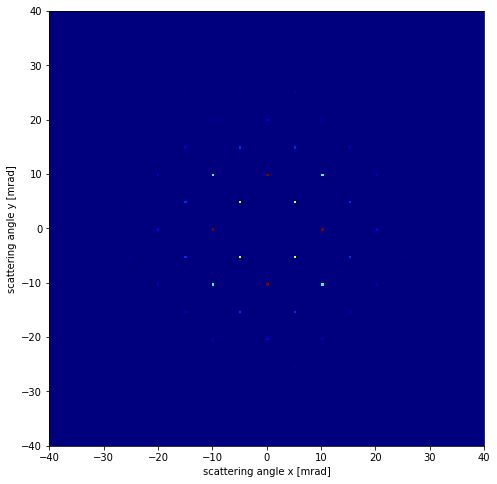

In [9]:
measurement = exit_waves.diffraction_pattern().mean(0)

measurement = block_zeroth_order(measurement) # block zero order component

data = measurement.array # get the diffraction pattern a numpy array

power = 1 # raise the data to this power to reveal more high-order spots

fig, ax = plt.subplots(1, 1, figsize=(8,8))

ax.imshow(data ** power, extent=measurement.extent, cmap='jet', interpolation='nearest')

ax.set_xlim([-40,40])
ax.set_ylim([-40,40])
ax.set_xlabel('scattering angle x [' + measurement.calibrations[0].units + ']')
ax.set_ylabel('scattering angle y [' + measurement.calibrations[1].units + ']')

In [ ]:
data